https://www.kaggle.com/datasets/arjunbhasin2013/ccdata

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/kurmukovai/ds-for-business/88ded3b36c5cc97c26756b4c62c98bbbf99deba3/2022/seminar-5/CC%20GENERAL.csv')
df.dropna(inplace=True)
df.head(3)

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.0,0.083333,0.00,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.0,0.000000,0.25,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.0,0.000000,0.00,0,12,7500.0,622.066742,627.284787,0.000000,12


# Credit Card dataset

- CUST_ID - Identification of Credit Card holder (Categorical)
- BALANCE - Balance amount left in their account to make purchases
- BALANCE_FREQUENCY - How frequently the Balance is updated, score between 0 and 1 (1 = frequently updated, 0 = not frequently updated)
- PURCHASES - Amount of purchases made from account
- ONEOFF_PURCHASES - Maximum purchase amount done in one-go
- INSTALLMENTS_PURCHASES - Amount of purchase done in installment
- CASH_ADVANCE - Cash in advance given by the user
- PURCHASES_FREQUENCY : How frequently the Purchases are being made, score between 0 and 1 (1 = frequently purchased, 0 = not frequently purchased)
- ONEOFF_PURCHASES_FREQUENCY - How frequently Purchases are happening in one-go (1 = frequently purchased, 0 = not frequently purchased)
- PURCHASES_INSTALLMENTS_FREQUENCY - How frequently purchases in installments are being done (1 = frequently done, 0 = not frequently done)
- CASH_ADVANCE_FREQUENCY - How frequently the cash in advance being paid
- CASH_ADVANCE_TRX - Number of Transactions made with "Cash in Advanced"
- PURCHASES_TRX - Numbe of purchase transactions made
- CREDIT_LIMIT - Limit of Credit Card for user
- PAYMENTS - Amount of Payment done by user
- MINIMUM_PAYMENTS - Minimum amount of payments made by user
- PRC_FULL_PAYMENT - Percent of full payment paid by user
- TENURE - Tenure of credit card service for user

# Make customer_id to be an index

In [ ]:
df.CUST_ID.nunique(), df.shape

(8636, (8636, 18))

In [ ]:
df.index = df['CUST_ID']
df = df.drop('CUST_ID', axis=1)
df.head(3)

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
CUST_ID,,,,,,,,,,,,,,,,,
C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.0,0.083333,0.00,0,2,1000.0,201.802084,139.509787,0.000000,12
C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.0,0.000000,0.25,4,0,7000.0,4103.032597,1072.340217,0.222222,12
C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.0,0.000000,0.00,0,12,7500.0,622.066742,627.284787,0.000000,12


# Start with basic EDA

In [ ]:
df.head(3)

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
CUST_ID,,,,,,,,,,,,,,,,,
C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.0,0.083333,0.00,0,2,1000.0,201.802084,139.509787,0.000000,12
C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.0,0.000000,0.25,4,0,7000.0,4103.032597,1072.340217,0.222222,12
C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.0,0.000000,0.00,0,12,7500.0,622.066742,627.284787,0.000000,12


# 1. Plot features distribution

- Plot a 3 by 6 plot with each subplot representing a  histogramm of features' distribution (e.g. using `plt.subplots(...)`).
- Add title for each subplot, and format its fontsize.
- Remove last (empty) subplot or make it invisible

save the resulting graph to pdf and upload to the reporting form.

In [ ]:
import matplotlib.pyplot as plt

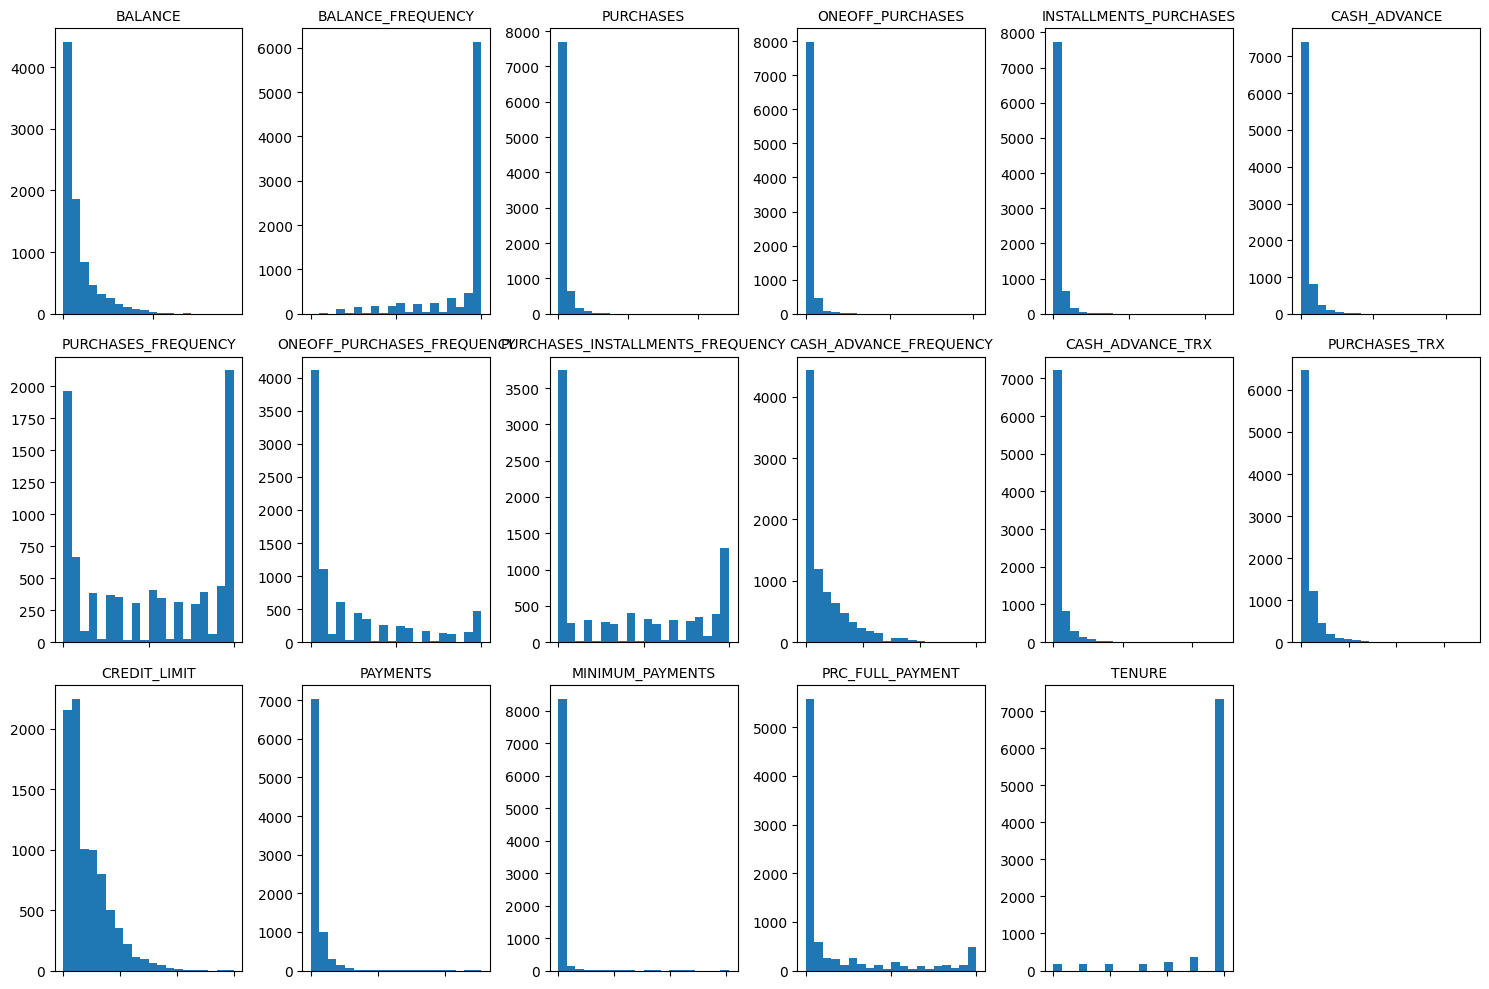

In [ ]:
# Create a 3x6 subplots figure
fig, axes = plt.subplots(3, 6, figsize=(15, 10))

# Flatten the axes array for easier iteration
axes = axes.flatten()

# Loop over each feature and plot its histogram
for i, column in enumerate(df.columns):
    # Plot histogram
    axes[i].hist(df[column], bins=20)

    # Set title and format fontsize
    axes[i].set_title(column, fontsize=10)

    # Remove x-axis labels for better visibility
    axes[i].set_xticklabels([])

# Remove the last subplot
fig.delaxes(axes[-1])

# Adjust the layout and spacing between subplots
fig.tight_layout()

# Save the plot as a PDF file
plt.savefig("features_distribution.pdf")


# 2. Preprocess features

All clustering algorithms requires some kind of feature standartization.
We will use standartization (or "z-scoring"):

$$X_{std} = \frac{X - mean(X)}{std(X)}$$

What is the mean of all columns in `X_std`? What is the standard deviation of all columns in `X_std`?


## Scientific notation

Recall that sometimes Python uses a so-called scientific notation for small numbers, e.g. notation `6.993531e-17` by definition is:

$$6.993531 \cdot 10^{-17} = \frac{6.993531}{10^{17}} = 0.00000000000000006993531$$.

For more details, see https://sparrow.dev/python-scientific-notation/ .

For the purposes of this home assignment all numbers with absolute value smaller than $0.000001$ are effectively $0$.

In [ ]:
X_standardized = ...

In [ ]:
from sklearn.preprocessing import StandardScaler
# Select the columns to be standardized
X = df[df.columns]

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the data using z-scoring
X_standardized = scaler.fit_transform(X)

# Calculate the mean of all columns in X_std
mean = X_standardized.mean(axis=0)

# Calculate the standard deviation of all columns in X_std
std_dev = X_standardized.std(axis=0)

print("Mean of all columns in X_std:")
print(mean)

print("Standard deviation of all columns in X_std:")
print(std_dev)

Mean of all columns in X_std:
[ 0.00000000e+00 -3.42271628e-16  1.15187567e-17 -3.29107335e-17
 -2.79741235e-17 -4.27839535e-17  6.58214670e-18 -3.29107335e-18
  8.22768337e-18  2.46830501e-17  2.71513551e-17 -1.15187567e-17
  1.11896494e-16 -2.63285868e-17 -4.44294902e-17  5.92393203e-17
  9.21500537e-17]
Standard deviation of all columns in X_std:
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


# 3. KMeans

What does K in KMeans means?


In [ ]:
# "K" stands for the number of clusters to look for in the data.

# Run KMeans with 5 clusters

In [ ]:
import numpy as np
from tqdm import tqdm
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score

In [ ]:
kmeans = KMeans(n_clusters=5, n_init='auto')
labels = kmeans.fit_predict(X_standardized)

In [ ]:
np.unique(labels, return_counts=True)

(array([0, 1, 2, 3, 4], dtype=int32), array([1356, 3745, 1103, 2346,   86]))

# 4. Run Kmeans with different number of clusters


Which number of clusters is optimal according to silhouette score?


In [ ]:
def run_kmeans(x, kmin=2, kmax=20):
    inertia = []
    for k in tqdm(range(kmin, kmax+1)):
        kmeans = KMeans(n_clusters=k, n_init='auto')
        kmeans.fit(x)
        results_df[f'clusters_kmeans_{k}'] = kmeans.predict(x)
        inertia.append(kmeans.inertia_)
    return inertia

In [ ]:
results_df = pd.DataFrame()
kmin, kmax = 2, 20
n_clusters = range(kmin, kmax+1)

# standardized
inertia = run_kmeans(X_standardized, kmin, kmax)

100%|██████████| 19/19 [00:05<00:00,  3.71it/s]


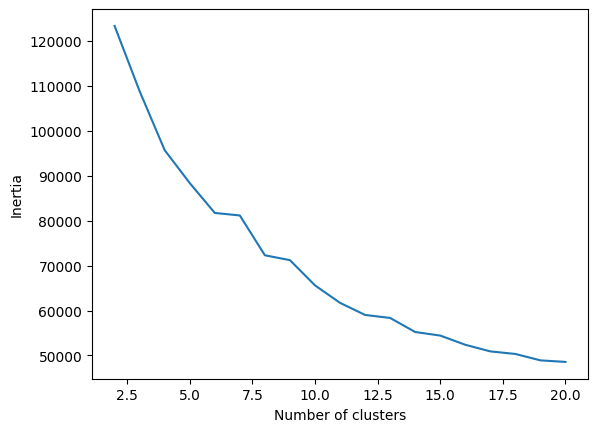

In [ ]:
plt.plot(n_clusters, inertia);
plt.xlabel('Number of clusters')
plt.ylabel('Inertia');

In [ ]:
#from plot_utils import plot_silhouette
# if you run in google colab copy-paste code from `plot_utils.py` into a notebook cell
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import numpy as np


def plot_silhouette(X, kmin=4, kmax=15, step=2):
  # Adopted from https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html#sphx-glr-auto-examples-cluster-plot-kmeans-silhouette-analysis-py

    range_n_clusters = range(kmin, kmax, step)

    for n_clusters in range_n_clusters:
        # Create a subplot with 1 row and 2 columns
        fig, ax1 = plt.subplots(1, 1)
        fig.set_size_inches(6, 3)

        # The 1st subplot is the silhouette plot
        # The silhouette coefficient can range from -1, 1 but in this example all
        # lie within [-0.1, 1]
        ax1.set_xlim([-0.1, 1])
        # The (n_clusters+1)*10 is for inserting blank space between silhouette
        # plots of individual clusters, to demarcate them clearly.
        ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

        # Initialize the clusterer with n_clusters value and a random generator
        # seed of 10 for reproducibility.
        clusterer = KMeans(n_clusters=n_clusters, n_init="auto", random_state=10)
        cluster_labels = clusterer.fit_predict(X)

        # The silhouette_score gives the average value for all the samples.
        # This gives a perspective into the density and separation of the formed
        # clusters
        silhouette_avg = silhouette_score(X, cluster_labels)
        print("For n_clusters =", n_clusters, "The average silhouette_score is :", silhouette_avg,)

        # Compute the silhouette scores for each sample
        sample_silhouette_values = silhouette_samples(X, cluster_labels)

        y_lower = 10
        for i in range(n_clusters):
            # Aggregate the silhouette scores for samples belonging to
            # cluster i, and sort them
            ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
            ith_cluster_silhouette_values.sort()

            size_cluster_i = ith_cluster_silhouette_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = cm.nipy_spectral(float(i) / n_clusters)
            ax1.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values,
                facecolor=color, edgecolor=color, alpha=0.7)

            # Compute the new y_lower for next plot
            y_lower = y_upper + 10  # 10 for the 0 samples


        ax1.set_title(f"The silhouette plot for the various clusters, n_clusters = {n_clusters}")
        ax1.set_xlabel("The silhouette coefficient values")
        ax1.set_ylabel("Cluster label")

        # The vertical line for average silhouette score of all the values
        ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

        ax1.set_yticks([])  # Clear the yaxis labels / ticks
        ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    plt.show()


def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

For n_clusters = 4 The average silhouette_score is : 0.1970633476945604
For n_clusters = 8 The average silhouette_score is : 0.1892266381391483
For n_clusters = 12 The average silhouette_score is : 0.21771895705090313
For n_clusters = 16 The average silhouette_score is : 0.19986413231372693
For n_clusters = 20 The average silhouette_score is : 0.2037068163716693


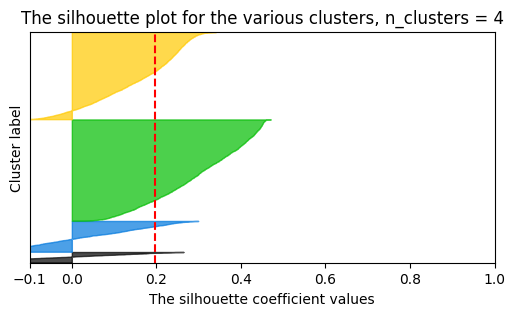

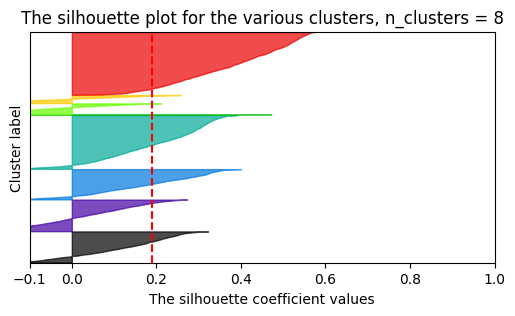

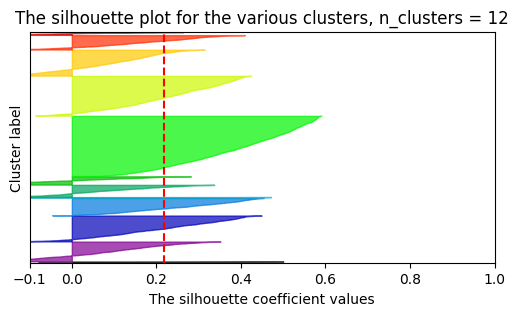

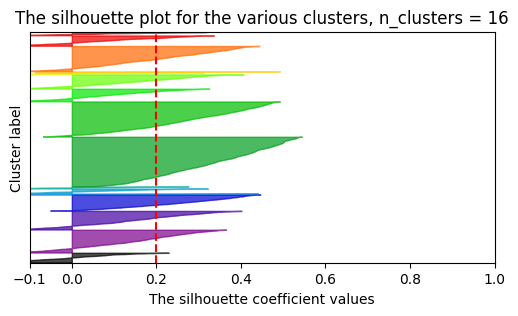

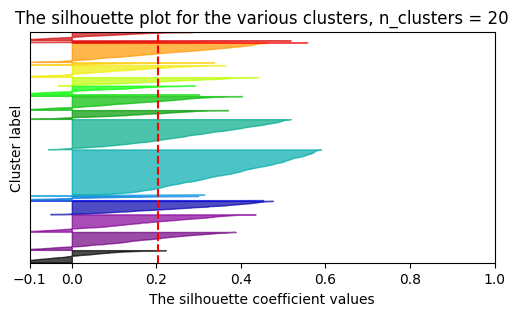

In [ ]:
plot_silhouette(X_standardized, kmin=4, kmax=21, step=4)

# 5. Hierarchical clustering

What is hieararchical clustering?


In [ ]:
#Hierarchical clustering is a technique that groups similar data into clusters using a tree-like structure known as a dendrogram.

# 6. Run hierarchical clustering

with different types of linkage looking for 8-12 clusters (choose one number):
 - "single"
 - "complete"
 - "ward"
 - "average"

For each type of linkage print sizes of the resulting clusters. Which of the linkages result in a non-degenerative clustering?

**Degenerative** clustering is a clustering of data into N clusters with most of the data being in a small subset of clusters, and rest of the clusters containing 1-5-10 points each.


In [ ]:
from sklearn.cluster import AgglomerativeClustering

In [ ]:
# Set the range of cluster numbers to try
cluster_range = range(8, 13)  # Try clusters from 8 to 12

# Set the linkage types to try
linkage_types = ["single", "complete", "ward", "average"]

# Iterate over the linkage types
for linkage in linkage_types:
    print("Linkage type:", linkage)
    for num_clusters in cluster_range:
        # Create an AgglomerativeClustering instance with the current linkage type and number of clusters
        clustering = AgglomerativeClustering(n_clusters=num_clusters, linkage=linkage)

        # Fit the clustering model to the data
        clustering.fit(X_standardized)

        # Count the sizes of resulting clusters
        cluster_sizes = pd.Series(clustering.labels_).value_counts().sort_index()

        # Print the sizes of resulting clusters
        print("Number of clusters:", num_clusters)
        print("Cluster sizes:")
        print(cluster_sizes)
        print()

Linkage type: single
Number of clusters: 8
Cluster sizes:
0    8629
1       1
2       1
3       1
4       1
5       1
6       1
7       1
dtype: int64

Number of clusters: 9
Cluster sizes:
0    8628
1       1
2       1
3       1
4       1
5       1
6       1
7       1
8       1
dtype: int64

Number of clusters: 10
Cluster sizes:
0    8627
1       1
2       1
3       1
4       1
5       1
6       1
7       1
8       1
9       1
dtype: int64

Number of clusters: 11
Cluster sizes:
0     8626
1        1
2        1
3        1
4        1
5        1
6        1
7        1
8        1
9        1
10       1
dtype: int64

Number of clusters: 12
Cluster sizes:
0        3
1        1
2     8623
3        1
4        1
5        1
6        1
7        1
8        1
9        1
10       1
11       1
dtype: int64

Linkage type: complete
Number of clusters: 8
Cluster sizes:
0    8552
1       3
2      20
3       7
4      16
5       1
6      36
7       1
dtype: int64

Number of clusters: 9
Cluster sizes:
0      

The linkage type "ward" is the one that results in a non-degenerative clustering pattern, as it produces clusters with a more balanced distribution of data points compared to the other linkage types.

# 7. Plot dendrogram

for Ward linkage from the previous question what distance treshold will result in 10 clusters?


In [ ]:
#from plot_utils import plot_dendrogram
# if you run in google colab copy paste code from `plot_utils.py` into a notebook cell

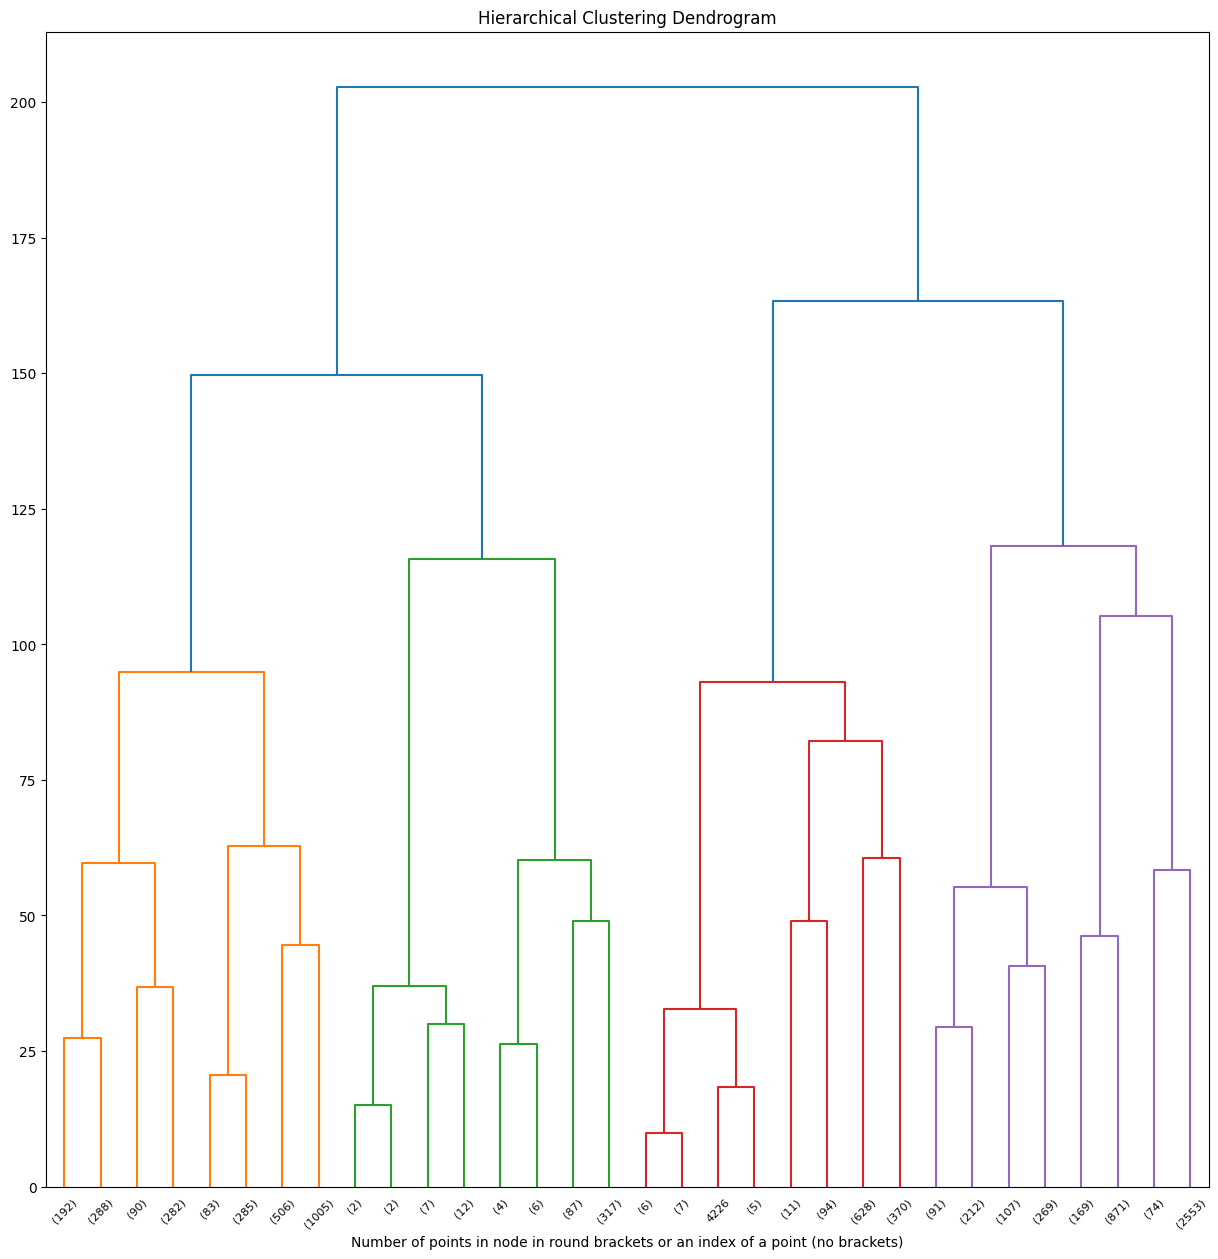

In [ ]:
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None, linkage='ward')
model = model.fit(X_standardized)

plt.figure(figsize=(15,15))
plt.title("Hierarchical Clustering Dendrogram")
plot_dendrogram(model, truncate_mode="level", p=4)# plot the top three levels of the dendrogram
plt.xlabel("Number of points in node in round brackets or an index of a point (no brackets)")
plt.show()

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage
Z = linkage(X_standardized, method='ward')

# Find the distance threshold for 10 clusters
distance_threshold = Z[-9, 2]  # The 10th cluster is formed by merging the clusters at index -9 and -10
print("Distance threshold for 10 clusters:", distance_threshold)


Distance threshold for 10 clusters: 82.08644108366639


If we look at the diagramn manually, we find the distance treshold that will result for 10 clusters is 75. But here on the code it's showing 82, so we can take the 75 as an answer for this question

# Visualization

To visualize our multi-dimensional data we will apply two differen dimensionality techniques: PCA and tSNE ("tea-sni")

# 8. Select all true statements about PCA


In [ ]:
#2,3,5

2 PCA linearly combines the original features to construct new, principal components.
3 Explained variance refers to the proportion of the dataset's total variance that is accounted for by each component.
5 PCA is an unsupervised algorithm mainly used for dimensionality reduction in data.

# Run PCA with 2 components

Unlike kmeans and hierarchical clustering PCA only requires data centering (without data scaling)

In [ ]:
X_mean = df - df.mean(axis=0)

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
pca = PCA(2)
X_pca2 = pca.fit_transform(X_mean)
print(pca.explained_variance_ratio_)
print(pca.explained_variance_ratio_.sum())

[0.47493166 0.17814415]
0.6530758107116069


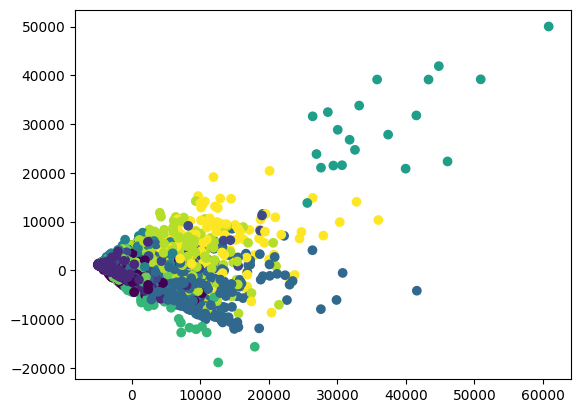

In [ ]:
kmeans = KMeans(n_clusters=10, n_init='auto')
labels = kmeans.fit_predict(X_standardized)

plt.scatter(X_pca2[:, 0], X_pca2[:, 1], c=labels); # Use kmeans labels for the color

PCA visualizations are not always informative, we will try using TSNE, but first we need to select the optimal number of PCA components

# 9. Select number of PCA components

based on explained variance ratio. Which minimal number of PCA components explain **atleast 95%** of the data variance (`X_mean`)?


# These are the `loadings` of the very first Principle component, which explains about 47% of data variance


In [ ]:
components = dict(zip(df.columns, pca.components_[0]))
components = sorted(components.items(), key=lambda x: x[1], reverse=True)

for c, w in components:
    print(c, np.round(w, 3))

CREDIT_LIMIT 0.687
PAYMENTS 0.488
PURCHASES 0.295
BALANCE 0.291
CASH_ADVANCE 0.217
ONEOFF_PURCHASES 0.213
MINIMUM_PAYMENTS 0.136
INSTALLMENTS_PURCHASES 0.082
PURCHASES_TRX 0.002
CASH_ADVANCE_TRX 0.0
TENURE 0.0
ONEOFF_PURCHASES_FREQUENCY 0.0
PURCHASES_FREQUENCY 0.0
CASH_ADVANCE_FREQUENCY 0.0
PURCHASES_INSTALLMENTS_FREQUENCY 0.0
BALANCE_FREQUENCY 0.0
PRC_FULL_PAYMENT 0.0


# 10. Select all correct statements

based on the whole PCA analysis


In [ ]:
# the correct statements are: 1, 5, 7, and 8.

# TSNE visualization

# 11. What is t-SNE?


In [ ]:
!pip install opentsne

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from openTSNE import TSNE

pca = PCA(10)
X_pca10 = pca.fit_transform(X_mean)
embedding = TSNE().fit(X_pca10)

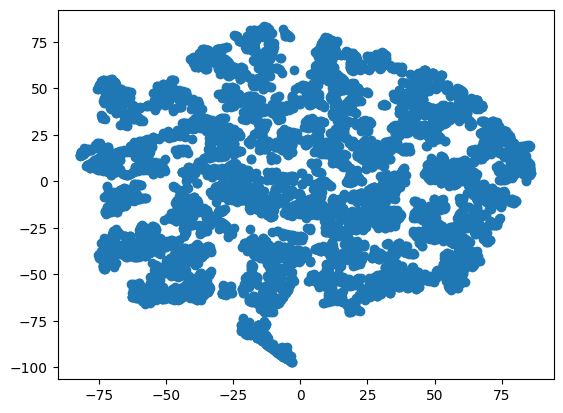

In [ ]:
plt.scatter(embedding[:, 0], embedding[:, 1]);

In [ ]:
ac = AgglomerativeClustering(n_clusters=8, linkage='ward')
prediction = ac.fit_predict(X_pca10)
np.unique(prediction, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7]),
 array([  93, 2336,  795,  165, 4504,   23,  673,   47]))

### tSNE with AgglomerativeClustering labels

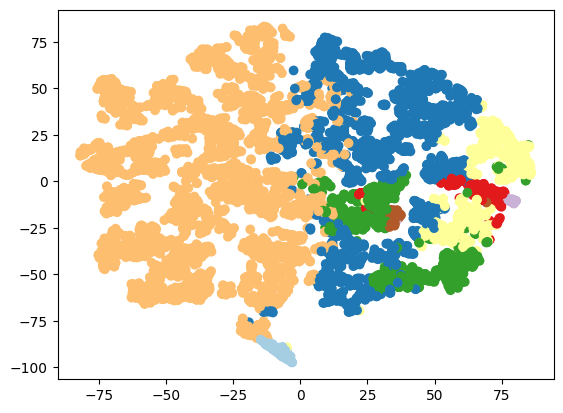

In [ ]:
plt.scatter(embedding[:, 0], embedding[:, 1], c=prediction, cmap='Paired');

### tSNE with KMeans clustering labels

In [ ]:
kmeans = KMeans(n_clusters=8, n_init='auto')
labels = kmeans.fit_predict(X_standardized)

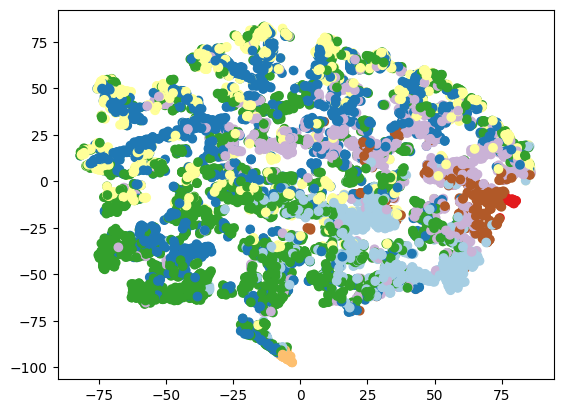

In [ ]:
plt.scatter(embedding[:, 0], embedding[:, 1], c=labels, cmap='Paired');

# 12. Which metrics are suitable for clusterings comparison?



In [ ]:
# NMI, AMI, ARI and Jaccard Score

# 13. Compare Kmeans and Agglomerative clusterings

with 8 clusters using Adjusted Rand Score, what is the value of ARI?


In [ ]:
from sklearn.metrics import adjusted_rand_score

# Assuming kmeans_labels and agglomerative_labels are the labels for K-means and Agglomerative clusterings, respectively
kmeans_labels = labels
agglomerative_labels = prediction

ari = adjusted_rand_score(kmeans_labels, agglomerative_labels)
print("Adjusted Rand Score (ARI):", ari)

Adjusted Rand Score (ARI): 0.15051485735701783


Visually KMeans and Agglomerative (with Ward distance) result in drastically different results, we will try to remove data outliers and see if it will affect the results

# Remove outliers

In [ ]:
def detect_outliers_very_simple(x, col):
    """A naive outliers detector, based on left most (5 percentile) or right most (95 percentile) threshold"""
    if col in ['BALANCE_FREQUENCY', 'TENURE']:
        return x < x.quantile(0.05)
    else:
        return x > x.quantile(0.95)

In [ ]:
cols_outliers = dict()
outliers = [False] * df.shape[0]

for col in df.columns:
    cols_outliers[col] = detect_outliers_very_simple(df[col], col)
    outliers += cols_outliers[col]
    print(col, np.round(cols_outliers[col].sum() / df.shape[0] * 100), '%')

BALANCE 5.0 %
BALANCE_FREQUENCY 4.0 %
PURCHASES 5.0 %
ONEOFF_PURCHASES 5.0 %
INSTALLMENTS_PURCHASES 5.0 %
CASH_ADVANCE 5.0 %
PURCHASES_FREQUENCY 0.0 %
ONEOFF_PURCHASES_FREQUENCY 0.0 %
PURCHASES_INSTALLMENTS_FREQUENCY 0.0 %
CASH_ADVANCE_FREQUENCY 4.0 %
CASH_ADVANCE_TRX 5.0 %
PURCHASES_TRX 5.0 %
CREDIT_LIMIT 4.0 %
PAYMENTS 5.0 %
MINIMUM_PAYMENTS 5.0 %
PRC_FULL_PAYMENT 0.0 %
TENURE 4.0 %


In [ ]:
X_mean['is_outlier'] = outliers

# 14. What is the percentage of detected outliers (to the whole data)?


In [ ]:
# Assuming the code provided is executed and 'cols_outliers' and 'outliers' are defined
total_outliers = sum(X_mean['is_outlier'])  # Count the total number of outliers
total_percentage = total_outliers / len(X_mean['is_outlier']) * 100  # Calculate the percentage of outliers

print("Total outliers percentage:", total_percentage, "%")


Total outliers percentage: 31.88976377952756 %


In [ ]:
X_mean.shape,X_standardized.shape

((8636, 18), (8636, 17))

# 15. Repeat the analysis on filtered data

Run:
1. PCA with 10 components
2. KMeans with **12 clusters** (using PCA representation), set `n_init='auto'`
3. Hierarchical clustering with **12 clusters** (using PCA representation)
4. Compare 2 and 3 using adjusted mutual information

what is the value of AMI?


In [ ]:
X_mean_filtered = X_mean.query('is_outlier==False')

In [ ]:
from sklearn.metrics import adjusted_mutual_info_score

In [ ]:
pca = PCA(10)
X_pca10 = pca.fit_transform(X_mean_filtered)
embedding = TSNE().fit(X_pca10)

In [ ]:
ac = AgglomerativeClustering(n_clusters=12, linkage='ward')
prediction = ac.fit_predict(X_pca10)
np.unique(prediction, return_counts=True)

kmeans = KMeans(n_clusters=12, n_init='auto')
labels = kmeans.fit_predict(X_pca10)

In [ ]:
kmeans_labels = labels
agglomerative_labels = prediction

ami = adjusted_mutual_info_score(kmeans_labels, agglomerative_labels)
print("Adjusted Mutual Info Score (AMI):", ami)

Adjusted Mutual Info Score (AMI): 0.6575479609847579


# 16. Plot a subplot with points colored according to kmeans and agglomerative clustering

Draw a 1 row 2 columns subplot using TSNE embeddings. Title each subplot according to the source of clusters' colors (kmeans or agglomerative). Save pdf and upload it to the submission form.

In [ ]:
embedding = TSNE().fit(X_pca10)

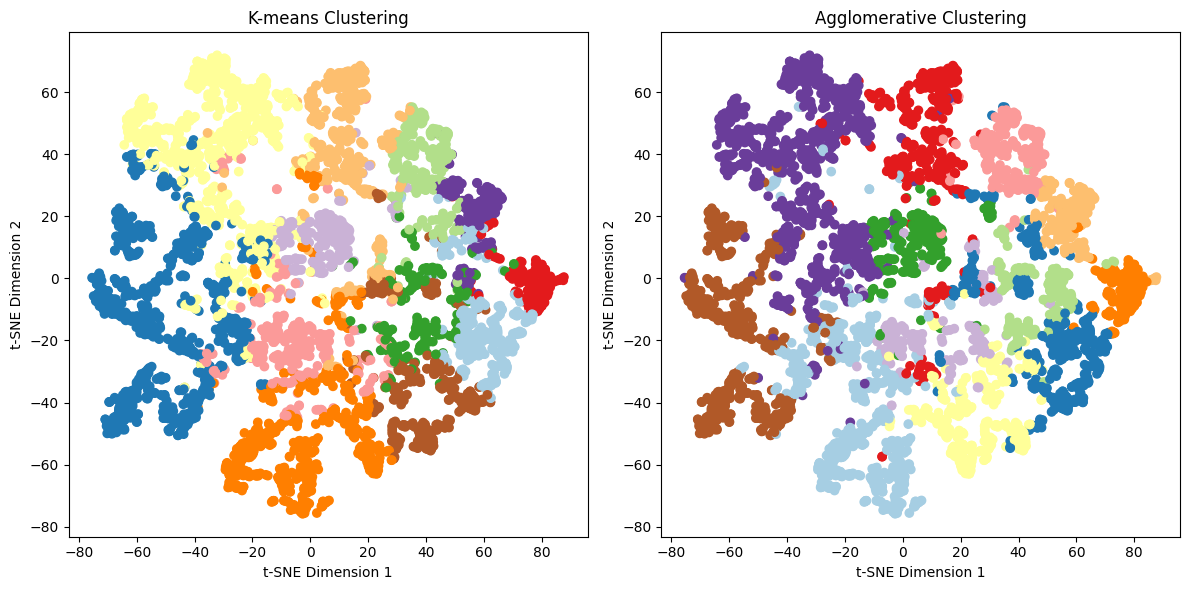

In [ ]:
# Create the subplot
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Plotting K-means clustering
axs[0].scatter(embedding[:, 0], embedding[:, 1], c=kmeans_labels, cmap='Paired')
axs[0].set_title('K-means Clustering')

# Plotting Agglomerative clustering
axs[1].scatter(embedding[:, 0], embedding[:, 1], c=agglomerative_labels, cmap='Paired')
axs[1].set_title('Agglomerative Clustering')

# Set common labels for both subplots
for ax in axs.flat:
    ax.set_xlabel('t-SNE Dimension 1')
    ax.set_ylabel('t-SNE Dimension 2')

# Adjust spacing between subplots
fig.tight_layout()

# Save the plot as PDF
plt.savefig('cluster_subplots.pdf')

# Show the plot
plt.show()

# Plotly visualization

> ChatGPT: `How to plot an interactive scatter plot in python so I can mouse over a point to see some label, provide a code example.`

> `What if my data source is stored in pandas DataFrame?`

> `How to add a color to each point?`

finalize with some manual edits (change title, add color alpha, etc.)

## Try to mouse over the points on the graph

In [ ]:
x_plot = pd.DataFrame(index=X_mean_filtered.index)
x_plot['tsne1'] = embedding[:, 0]
x_plot['tsne2'] = embedding[:, 1]
x_plot['customer_id'] = range(embedding.shape[0])
x_plot['cluster_agg'] = prediction
x_plot['cluster_kmeans'] = labels
x_plot = x_plot.reset_index()

In [ ]:
!pip install plotly

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import plotly.express as px

In [ ]:
fig = px.scatter(x_plot, x='tsne1', y='tsne2', color='cluster_agg', hover_data=['CUST_ID'], )

# Customize aspect
fig.update_traces(marker=dict(size=5, line=dict(width=0.5)), selector=dict(mode='markers'))
fig.update_layout(title='TSNE plot of customers clusters', xaxis_title='x', yaxis_title='y')
fig.update_yaxes(scaleanchor = "x", scaleratio = 1)

fig.show()


# 17. Interpret the resulting clusters

Try to interpret the resulting clusters, you can use smaller number of clusters (e.g. 4-8) and any clustering algorithm you want. Provide a short but detailed report <300 words. Save it to pdf and upload to submission form.